In [1]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib
matplotlib.rcParams["image.interpolation"] = None
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from glob import glob
from tqdm import tqdm
from tifffile import imread
from csbdeep.utils import Path, download_and_extract_zip_file





download_and_extract_zip_file(
    url       = 'https://github.com/stardist/stardist/releases/download/0.1.0/dsb2018.zip',
    targetdir = 'data',
    verbose   = 1,
)
X = sorted(glob('data/dsb2018/train/images/*.tif'))
Y = sorted(glob('data/dsb2018/train/masks/*.tif'))
#assert all(Path(x).name==Path(y).name for x,y in zip(X,Y))

Files found, nothing to download.


Number of Nodes : 1911  Number of Edges : 2646


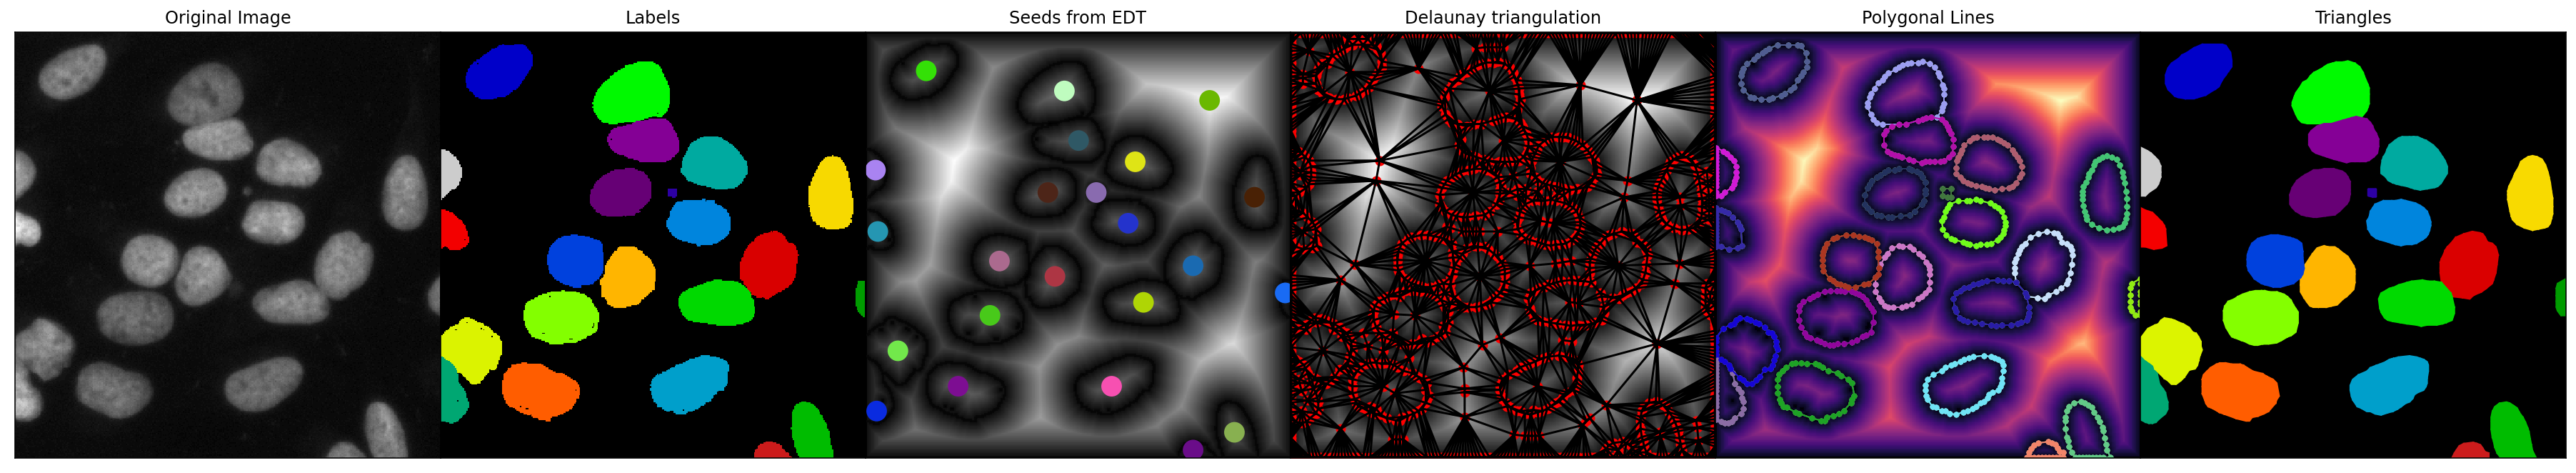

In [12]:
import skimage.io as io 
import numpy as np 
import matplotlib.pyplot as plt
from delaunay_watershed_2d import geometry_reconstruction_2d
def make_idx(n): 
    return(("000"+str(n))[-3:])

img = imread(X[6])
lbl = imread(Y[6])

DW = geometry_reconstruction_2d(lbl,expansion_labels=0, min_dist=3,original_image=img)
DW.extended_plot()
plt.savefig("Nuclei.eps")